# TensorFlow: Evaluating & Prediction

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 

# Build Model

In [2]:
input_shape = (28, 28, 1)
num_classes = 10

learning_rate = 0.001

In [3]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.s.Model(inputs=inputs, outputs=net, name='Basic_CNN')kera

In [4]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Preprocess

데이터셋 불러오기 

In [5]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [6]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

train_x = train_x / 255.
test_x = test_x / 255.

# Training

In [7]:
num_epochs = 1
batch_size = 64

In [8]:
hist = model.fit(train_x, train_y, 
                 batch_size=batch_size, 
                 shuffle=True)

Train on 60000 samples
60000/60000 [==============================] - 472s 8ms/sample - loss: 0.2146 - accuracy: 0.9294


In [9]:
hist.history # .history : epoch 당 log가 하나씩 나옴

{'loss': [0.2145677317097783], 'accuracy': [0.9294]}

# Evaluating  
- 학습한 모델 확인

In [10]:
model.evaluate(test_x, test_y, batch_size=batch_size)

10000/10000 [==============================] - 19s 2ms/sample - loss: 0.0441 - accuracy: 0.9856


[0.044113552751019594, 0.9856]

### 결과 확인

Input으로 들어갈 이미지 데이터 확인

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
test_image = test_x[0,:,:,0] # 0번째 image, image 보기위해 28x28로 reshape
test_image.shape

(28, 28)

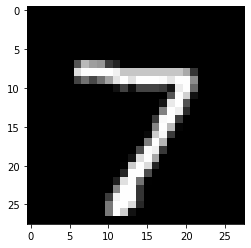

In [20]:
plt.imshow(test_image, 'gray')
plt.show()

- 모델에 Input Data로 확인할 이미지 데이터 넣기

In [21]:
test_image.shape

(28, 28)

In [22]:
pred = model.predict(test_image.reshape(1,28,28,1)) # model에 fit할 때 (1,28,28,1)로 학습시켜줬기때문에 predict할 때도 똑같이 또 reshape

In [23]:
pred.shape

(1, 10)

In [24]:
pred
# 알 수 없는 숫자들로 이루어져있음. 이게 뭘까
# 모델에서 마지막에 softmax를 했고, 마지막 노드에서 가장 높은 값을 내뱉는 노드가 모델이 생각하는 정답! 

array([[2.3654262e-07, 5.5107904e-07, 5.3109407e-06, 3.9924435e-05,
        1.2695770e-07, 2.3171873e-07, 1.1269899e-10, 9.9989974e-01,
        3.2426124e-07, 5.3570253e-05]], dtype=float32)

- np.argmax

In [17]:
np.argmax(pred) # 가장 높은 값의 index를 내뱉어줌

7

## Test Batch

Batch로 Test Dataset 넣기

In [27]:
test_batch = test_x[:32]
test_batch.shape

(32, 28, 28, 1)

Batch Test Dataset 모델에 넣기

In [30]:
preds = model.predict(test_batch) # label 넣어줄 필요 x
preds.shape # 위의 pred 형태가 32개로 쌓여서 나온 것

(32, 10)

- 결과 확인

In [29]:
preds

array([[2.36542164e-07, 5.51077505e-07, 5.31093065e-06, 3.99243581e-05,
        1.26957460e-07, 2.31718289e-07, 1.12698559e-10, 9.99899745e-01,
        3.24260640e-07, 5.35701511e-05],
       [1.23183827e-06, 1.54592826e-07, 9.99997377e-01, 3.38629235e-07,
        7.97732269e-10, 1.39315046e-10, 7.15384488e-07, 2.16336213e-10,
        1.76658020e-07, 1.80064713e-10],
       [2.85502647e-05, 9.98987615e-01, 3.57730169e-05, 1.12348689e-05,
        6.26724563e-04, 1.32839823e-05, 4.59852272e-05, 1.71815322e-04,
        4.51200140e-05, 3.38421560e-05],
       [9.98899579e-01, 5.21935348e-08, 4.41955890e-05, 1.37883817e-05,
        4.65725725e-06, 4.92770687e-06, 7.18638184e-04, 1.09908970e-05,
        2.56746644e-05, 2.77628511e-04],
       [2.74441987e-07, 4.80887969e-08, 1.16192091e-07, 1.85411562e-08,
        9.99678969e-01, 1.82023101e-07, 2.23985671e-06, 1.08064917e-07,
        1.00997443e-06, 3.16991500e-04],
       [1.08543818e-05, 9.99529839e-01, 1.43449843e-05, 1.82942676e-06,
   

In [32]:
np.argmax(preds, -1)
# 32개 각각 데이터에 대한 argmax

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1], dtype=int64)

- 위 결과를 시각화해서 맞는지 비교해보자
    - 정확도 98%라 웬만해선 다 맞을거야

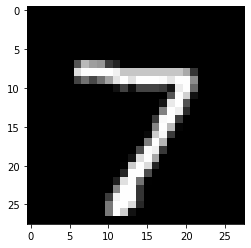

In [33]:
plt.imshow(test_batch[0,:,:,0], 'gray') # 0번째 image
plt.show()

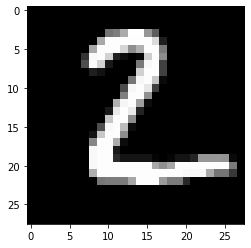

In [34]:
plt.imshow(test_batch[1,:,:,0], 'gray') # 1번째 image
plt.show()

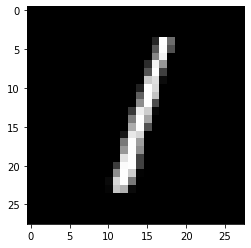

In [35]:
plt.imshow(test_batch[2,:,:,0], 'gray') # 3번째 image
plt.show()

# test set은 학습에 넣지도 않았고 영향을 준 게 없음에도 불구하고 잘 맞추고있지지